In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
sample_data = data.sample(500, random_state=42)

# Assuming you have the sample data in a pandas DataFrame called 'sample_data'

# Step 1: Calculate sample statistic
sample_statistic = sample_data['Debtor'].mean()  # Example: Mean

# Step 2: Choose a confidence level
confidence_level = 0.95  # For a 95% confidence level

# Step 3: Calculate the standard error (assuming you're estimating the population mean)
sample_size = len(sample_data)
standard_deviation = np.std(data['Debtor'], ddof=1)  # ddof=1 for sample standard deviation
standard_error = standard_deviation / np.sqrt(sample_size)

# Step 4: Compute the margin of error
margin_of_error = ((1 - confidence_level) / 2) * standard_error

# Step 5: Construct the confidence interval
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

print("Sample Statistic:", sample_statistic)
print("Confidence Interval:", (lower_bound, upper_bound))
print("Margin of error:", margin_of_error)

Sample Statistic: 0.118
Confidence Interval: (0.11764504655845391, 0.11835495344154608)
Margin of error: 0.00035495344154608884


4424


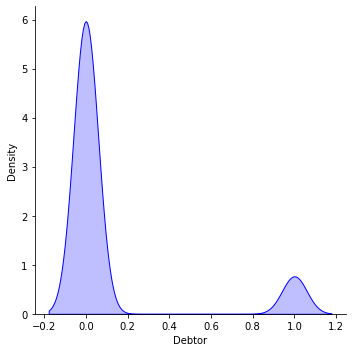

500


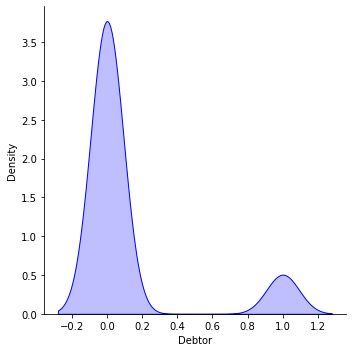

In [4]:
print(len(data))
sns.displot(data['Debtor'], kind='kde', color='blue', fill=True)
plt.show()
print(len(sample_data))
sns.displot(sample_data['Debtor'], kind='kde', color='blue', fill=True)
plt.show()

### Define Null and Alternative Hypothesis

Null Hypothesis (H0): The dropout rate among students is related to whether the student is a debtor (=)

Alternative Hypothesis (H1): The dropout rate among students is not related to whether the student is a debtor (not equal to =/=)

In [6]:
# Choose a Significance Level (alpha)
alpha = 0.05

# Collect Data
# Create a contingency table of observed frequencies
observed = pd.crosstab(sample_data['Debtor'], sample_data['Target'])
print(observed, "\n\n")

# Perform Chi-squared Test
chi2, p_value, _, expected_freq = chi2_contingency(observed)
print(chi2, p_value)
print(expected_freq)

# Interpret Results
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence that the dropout rate among students is related to whether the student is a debtor")
else:
    print("Fail to reject Null Hypothesis: There is no evidence that the dropout rate among students is related to whether the student is a debtor")

Target  Dropout  Enrolled  Graduate
Debtor                             
0           133        80       228
1            37         9        13 


25.964663796640515 2.30062001798555e-06
[[149.94   78.498 212.562]
 [ 20.06   10.502  28.438]]
Reject Null Hypothesis: There is evidence that the dropout rate among students is related to whether the student is a debtor


NULL HYPOTHESIS 1: there is no significant correlation between the dropout rate among students and debtor.

ALTERNATE HYPOTHESIS 1: there is a significant correlation between the dropout rate among students and debtor.

In [7]:
# Calculate Spearman's rank correlation
encoder = LabelEncoder()
correlation, p_value = pearsonr(sample_data['Debtor'], encoder.fit_transform(sample_data["Target"]))

print("Spearman's Rank Correlation Coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence that there is a significant correlation between the dropout rate among students is related to the debtor.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence that there is a significant correlation between the dropout rate among students is related to the debtor.")

Spearman's Rank Correlation Coefficient: -0.22416197417206118
p-value: 4.095633102259668e-07
Reject Null Hypothesis: There is evidence that there is a significant correlation between the dropout rate among students is related to the debtor.
